In [1]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda ,Dense ,Flatten
import numpy as np

In [2]:
classifier = VGG19(input_shape= (224,224,3),include_top=False,weights='imagenet')

classifier.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [3]:
for layer in classifier.layers:
    layer.trainable = False

In [4]:
classifier1 = classifier.output#head model
classifier1 = Flatten()(classifier1)#adding layer of flatten
classifier1 = Dense(units=64, activation='relu')(classifier1)#adding layer of dense
classifier1 = Dense(units=1, activation='sigmoid')(classifier1)#again adding another layer of dense

In [5]:
model = Model(inputs = classifier.input , outputs = classifier1)
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        rescale = 1./255)

test_datagen = ImageDataGenerator(rescale=1. / 255)



training_set = train_datagen.flow_from_directory(r'C:\Users\Anas\Desktop\minorproject\train',
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory(r'C:\Users\Anas\Desktop\minorproject\test',
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='binary')

Found 1400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [7]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=1)
mc = ModelCheckpoint(filepath="my_model_VGG-19.h", monitor="val_accuracy", verbose=1, save_best_only= True)

In [8]:
history = model.fit(training_set,
                              validation_data=test_set,
                              epochs=10,
                              steps_per_epoch=len(training_set),
                              validation_steps=len(test_set),
                              callbacks=[es,mc])

Epoch 1/10
44/44 [==============================] - 1023s 23s/step - loss: 0.1706 - accuracy: 0.9421 - val_loss: 0.6266 - val_accuracy: 0.8850

Epoch 00001: val_accuracy improved from -inf to 0.88500, saving model to my_model_VGG-19.h
INFO:tensorflow:Assets written to: my_model_VGG-19.h\assets
Epoch 2/10
44/44 [==============================] - 838s 19s/step - loss: 0.0396 - accuracy: 0.9843 - val_loss: 0.5347 - val_accuracy: 0.8667

Epoch 00002: val_accuracy did not improve from 0.88500
Epoch 3/10
44/44 [==============================] - 839s 19s/step - loss: 0.0378 - accuracy: 0.9857 - val_loss: 1.1569 - val_accuracy: 0.8917

Epoch 00003: val_accuracy improved from 0.88500 to 0.89167, saving model to my_model_VGG-19.h
INFO:tensorflow:Assets written to: my_model_VGG-19.h\assets
Epoch 4/10
44/44 [==============================] - 927s 21s/step - loss: 0.0187 - accuracy: 0.9921 - val_loss: 0.7335 - val_accuracy: 0.8900

Epoch 00004: val_accuracy did not improve from 0.89167
Epoch 00004:

In [9]:
model.save(r'C:\Users\Anas\Desktop\minorproject\my_model_VGG-19.h5')

In [10]:
loaded_model = tf.keras.models.load_model(r'C:\Users\Anas\Desktop\minorproject\my_model_VGG-19.h5')
loaded_model.evaluate(test_set)

19/19 [==============================] - 435s 24s/step - loss: 0.7335 - accuracy: 0.8900


[0.7335384488105774, 0.8899999856948853]

In [11]:
y_pred = model.predict(test_set)
import numpy as np
y_pred = np.argmax(y_pred , axis=1)

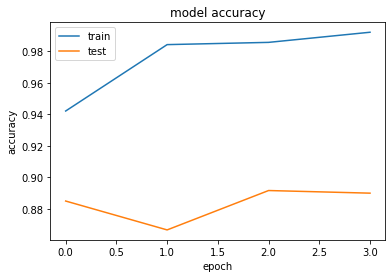

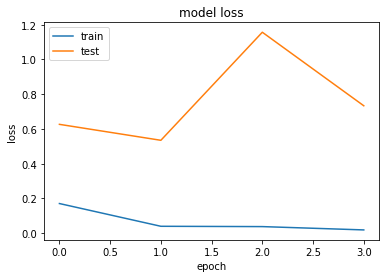

In [12]:
#plotting acc and loss
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Normal


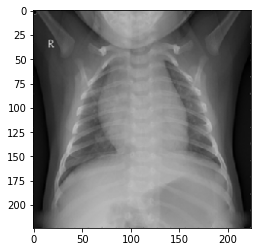

In [13]:
# for only one prediction
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = image.load_img(
   r'C:\Users\Anas\Desktop\minorproject\normal\Normal-1390.png',
    target_size=(224,224))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = loaded_model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'Normal'
else:
    prediction = 'Covid'
print(prediction)

In [14]:
# plot confusion metrix
y_pred = []
y_test = []
import os

for i in os.listdir(r"C:\Users\Anas\Desktop\minorproject\test\normal"):
    img = image.load_img(r"C:\Users\Anas\Desktop\minorproject\test\normal/" + i, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict(img)
    y_test.append(p[0, 0])
    y_pred.append(1)

for i in os.listdir(r"C:\Users\Anas\Desktop\minorproject\test\Covid"):
    img = image.load_img(r"C:\Users\Anas\Desktop\minorproject\test\Covid/" + i, target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = model.predict(img)
    y_test.append(p[0, 0])
    y_pred.append(0)

y_pred = np.array(y_pred)
y_test = np.array(y_test).astype(int)

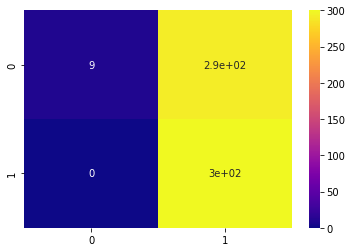

              precision    recall  f1-score   support

           0       1.00      0.03      0.06       300
           1       0.51      1.00      0.67       300

    accuracy                           0.52       600
   macro avg       0.75      0.52      0.37       600
weighted avg       0.75      0.52      0.37       600



In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, cmap="plasma", annot=True)
plt.show()

print(classification_report(y_pred, y_test))